<a href="https://colab.research.google.com/github/1EduardOrtega/Alura_Store_Latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



**Iniciamos analizando las ventas totales que han tenido cada una de las tiendas para poder determinar el desempeño de ventas de cada una, pudiendo obtener cual de ella es la que menos ventas esta teniendo**

In [ ]:
#Se suman las venta por cada tienda
ingresos_tienda1 = tienda1['Precio'].sum()
ingresos_tienda2 = tienda2['Precio'].sum()
ingresos_tienda3 = tienda3['Precio'].sum()
ingresos_tienda4 = tienda4['Precio'].sum()

#Visualizando el total de ventas por tienda
print("Ingresos totales por tienda:")
print(f"Tienda 1: ${ingresos_tienda1:,.2f}")
print(f"Tienda 2: ${ingresos_tienda2:,.2f}")
print(f"Tienda 3: ${ingresos_tienda3:,.2f}")
print(f"Tienda 4: ${ingresos_tienda4:,.2f}")

Ingresos totales por tienda:
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


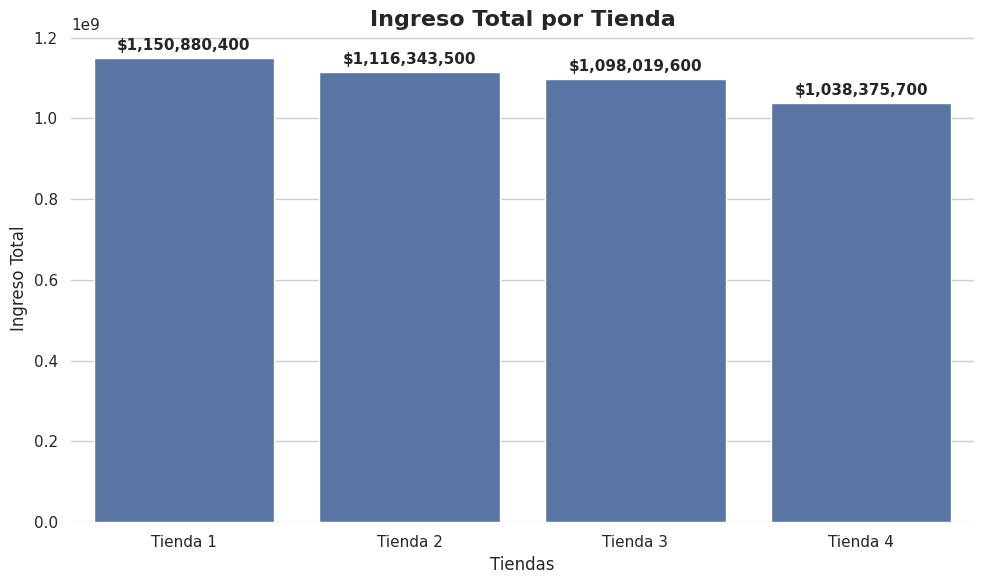

In [ ]:
#Graficando las ventas totales para una mejor visualización.

sns.set_theme(style="whitegrid")
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos_por_tienda = [ingresos_tienda1, ingresos_tienda2, ingresos_tienda3, ingresos_tienda4]

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=tiendas, y=ingresos_por_tienda)

#etiquetas a cada barra
for i, valor in enumerate(ingresos_por_tienda):
    barplot.text(i, valor + max(ingresos_por_tienda)*0.01, f"${valor:,.0f}",
                 ha='center', va='bottom', fontsize=11, fontweight='bold')

# Título y etiquetas
plt.title('Ingreso Total por Tienda', fontsize=16, fontweight='bold')
plt.ylabel('Ingreso Total', fontsize=12)
plt.xlabel('Tiendas', fontsize=12)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

**Teniendo las ventas totales en general, es visible que la tienda 4 fue la que menos vendió en total, sin embargo, deseamos analizar las ventas anuales de cada tienda para tener un mejor panorama de las ventas que tuvieron cada tienda por año **

In [ ]:
#Revisamos las ventas por año de cada una de las tiendas para visualizar mejor las ventas


for df in [tienda1, tienda2, tienda3, tienda4]:
    df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], errors='coerce')
    df['Año'] = df['Fecha de Compra'].dt.year

ventas_por_anio = {
    'Tienda 1': tienda1.groupby('Año')['Precio'].sum(),
    'Tienda 2': tienda2.groupby('Año')['Precio'].sum(),
    'Tienda 3': tienda3.groupby('Año')['Precio'].sum(),
    'Tienda 4': tienda4.groupby('Año')['Precio'].sum()
}

df_ventas_anuales = pd.DataFrame(ventas_por_anio)

print("Ventas totales por tienda y año:\n")
print(df_ventas_anuales)

print("\nTienda que más vendió por año:\n")
print(df_ventas_anuales.idxmax(axis=1))

print("\nTienda que menos vendió por año:\n")
print(df_ventas_anuales.idxmin(axis=1))


Ventas totales por tienda y año:

         Tienda 1     Tienda 2     Tienda 3     Tienda 4
Año                                                     
2020  368933200.0  131441000.0  321707500.0  112464600.0
2021  362120800.0  115219300.0  362954400.0  120668900.0
2022  316565600.0  143767200.0  350438300.0  110838000.0
2023  103260800.0   39622200.0   62919400.0   24743600.0

Tienda que más vendió por año:

Año
2020    Tienda 1
2021    Tienda 3
2022    Tienda 3
2023    Tienda 1
dtype: object

Tienda que menos vendió por año:

Año
2020    Tienda 4
2021    Tienda 2
2022    Tienda 4
2023    Tienda 4
dtype: object


/tmp/ipython-input-915809269.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], errors='coerce')
/tmp/ipython-input-915809269.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], errors='coerce')


**En base a los resultados podemos observar que la tienda 4 es la que a tenido un bajo desempeño en las ventas siendo la tienda que menos a vendido en dos años diferentes siendo dos de ellos consecutivos,  visualicemos una grafica para poder observar mejor las ventas anuales**

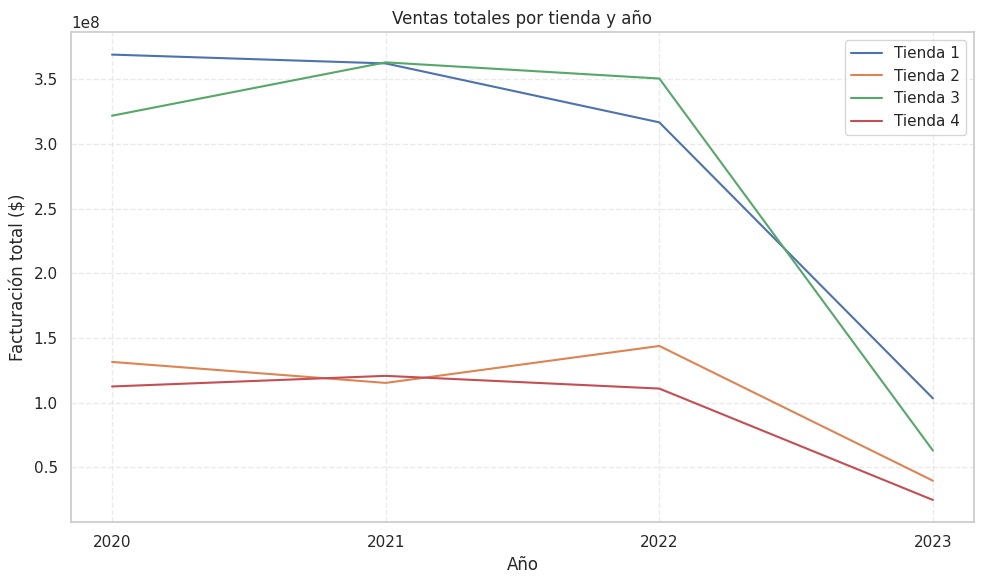

In [ ]:
plt.figure(figsize=(10,6))

for tienda in df_ventas_anuales.columns:
    plt.plot(df_ventas_anuales.index, df_ventas_anuales[tienda], label=tienda)

plt.title("Ventas totales por tienda y año")
plt.xlabel("Año")
plt.ylabel("Facturación total ($)")
plt.xticks(df_ventas_anuales.index.astype(int))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


**Teniendo ya las ventas anuales aun podemos analizar un poco mas las ventas para poder determinar si la tienda con menos ventas, siendo la Tienda 4, presenta un margen significativo entre sus ventas, con esto podremos determinar si la tienda aún tiene una viabilidad para poder seguir trabajando en esta con estrategias o su viabilidad ya es dudosa por lo que venderla sería una opción**

In [ ]:

margen_vs_siguiente = []

for año in df_ventas_anuales.index:
    ventas_anuales = df_ventas_anuales.loc[año].sort_values()
    menor = ventas_anuales.iloc[0]
    siguiente = ventas_anuales.iloc[1]
    margen = siguiente - menor
    margen_vs_siguiente.append({
        'Año': año,
        'Tienda con menos ventas': ventas_anuales.index[0],
        'Ventas mínimas ($)': menor,
        'Ventas siguiente más baja ($)': siguiente,
        'Diferencia ($)': margen,
        'Margen relativo (%)': (margen / siguiente) * 100
    })

df_margen = pd.DataFrame(margen_vs_siguiente)
print("\nMargen de diferencia entre la tienda con menos ventas y la siguiente:\n")
print(df_margen)



Margen de diferencia entre la tienda con menos ventas y la siguiente:

    Año Tienda con menos ventas  Ventas mínimas ($)  \
0  2020                Tienda 4         112464600.0   
1  2021                Tienda 2         115219300.0   
2  2022                Tienda 4         110838000.0   
3  2023                Tienda 4          24743600.0   

   Ventas siguiente más baja ($)  Diferencia ($)  Margen relativo (%)  
0                    131441000.0      18976400.0            14.437200  
1                    120668900.0       5449600.0             4.516160  
2                    143767200.0      32929200.0            22.904529  
3                     39622200.0      14878600.0            37.551171  


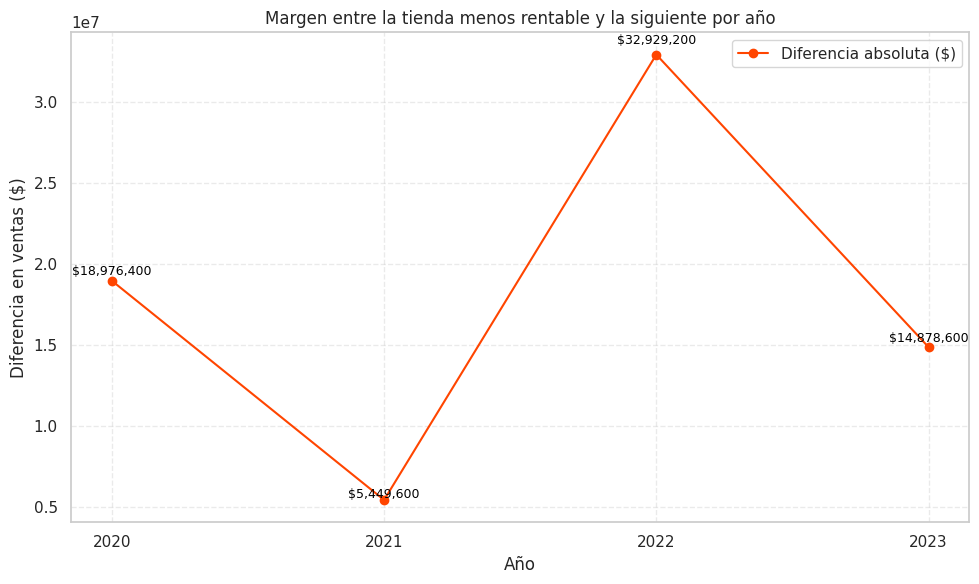

In [ ]:
#Creamos una grafica para poder visualizar mejor
plt.figure(figsize=(10,6))


plt.plot(df_margen['Año'], df_margen['Diferencia ($)'], marker='o', color='orangered', label='Diferencia absoluta ($)')


for i, row in df_margen.iterrows():
    monto = row['Diferencia ($)']
    plt.text(row['Año'], monto + (monto * 0.02), f"${monto:,.0f}", ha='center', fontsize=9, color='black')


plt.title('Margen entre la tienda menos rentable y la siguiente por año')
plt.xlabel('Año')
plt.ylabel('Diferencia en ventas ($)')
plt.xticks(df_ventas_anuales.index.astype(int))
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


**Con el anterior análisis podemos notar que el margen de ventas de la tienda 4 en su primer año de bajas ventas existe un margen del 14%, lo cual aun pude ser viable ya que el margen no es realmente significativo, sin embargo, en el año 2022 el margen sube a un 22% lo cual resulta preocupante y siendo el punto donde se pudo realizar un cambio para mejorar las ventas. Llegando al año 2023 la tienda tuvo un margen del 37% lo cual ya resulta significativo por lo que la viabilidad de la tienda ya está en duda, pudiendo ser su la venta una opción para esta tienda antes de tener más ventas bajas**

In [ ]:
# Verificamos las venta por cada metodo de pago
metodos_pago = df_union.groupby(['Tienda', 'Método de pago']).size().reset_index(name='Cantidad')

totales_tienda = df_union['Tienda'].value_counts().reset_index()
totales_tienda.columns = ['Tienda', 'Total Ventas']

metodos_pago = metodos_pago.merge(totales_tienda, on='Tienda')
metodos_pago['Porcentaje'] = (metodos_pago['Cantidad'] / metodos_pago['Total Ventas']) * 100

metodos_pago['Porcentaje'] = metodos_pago['Porcentaje'].round(2)


print("Distribución de métodos de pago por tienda:\n")
print(metodos_pago)


Distribución de métodos de pago por tienda:

      Tienda      Método de pago  Cantidad  Total Ventas  Porcentaje
0   Tienda 1               Cupón       137          2359        5.81
1   Tienda 1               Nequi       483          2359       20.47
2   Tienda 1  Tarjeta de crédito      1704          2359       72.23
3   Tienda 1   Tarjeta de débito        35          2359        1.48
4   Tienda 2               Cupón       141          2359        5.98
5   Tienda 2               Nequi       467          2359       19.80
6   Tienda 2  Tarjeta de crédito      1721          2359       72.95
7   Tienda 2   Tarjeta de débito        30          2359        1.27
8   Tienda 3               Cupón       101          2359        4.28
9   Tienda 3               Nequi       468          2359       19.84
10  Tienda 3  Tarjeta de crédito      1753          2359       74.31
11  Tienda 3   Tarjeta de débito        37          2359        1.57
12  Tienda 4               Cupón       125          2358  

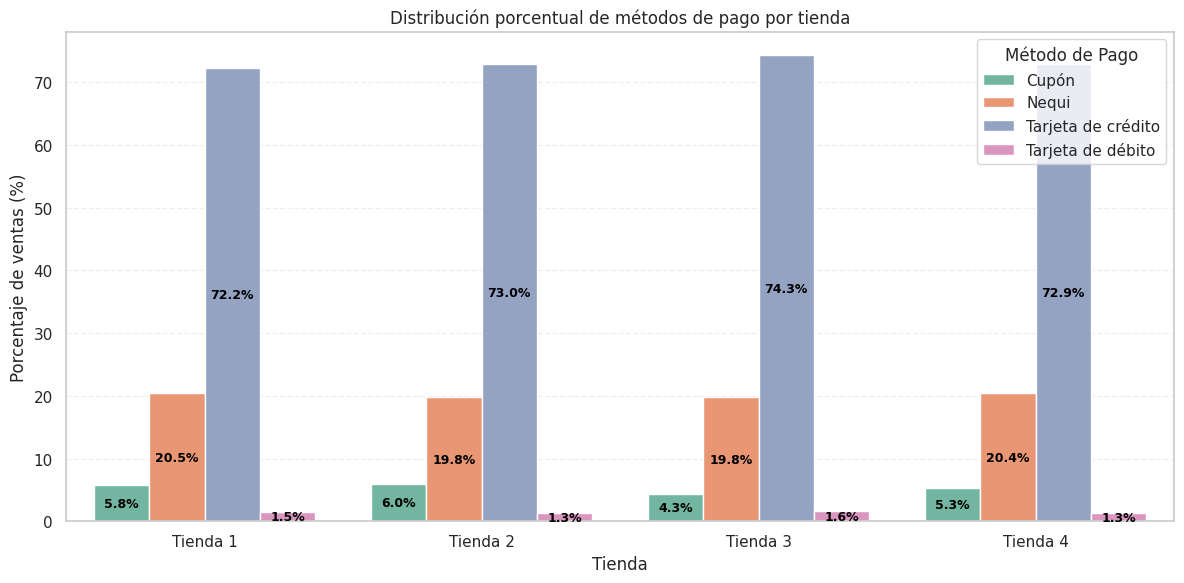

In [ ]:

plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=metodos_pago,
    x='Tienda',
    y='Porcentaje',
    hue='Método de pago',
    palette='Set2'
)


plt.title('Distribución porcentual de métodos de pago por tienda')
plt.ylabel('Porcentaje de ventas (%)')
plt.xlabel('Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title='Método de Pago')

for p in barplot.patches:
    height = p.get_height()
    if height > 0:
        barplot.annotate(
            f'{height:.1f}%',
            (p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
            ha='center',
            va='center',
            fontsize=9,
            color='black',
            weight='bold'
        )

plt.tight_layout()
plt.show()


**La distribución de ventas por cada método de pago es similar por lo que no seria razonable atribuir las bajas ventas en algunas tiendas, en la tienda 4 sobre todo, a este factor ya que no resulta determinante la diferencia que existe en cada una de las tiendas**

In [ ]:
#Verificamos el promedio de cuotas por tienda
promedio_cuotas = {
    'Tienda 1': tienda1['Cantidad de cuotas'].mean(),
    'Tienda 2': tienda2['Cantidad de cuotas'].mean(),
    'Tienda 3': tienda3['Cantidad de cuotas'].mean(),
    'Tienda 4': tienda4['Cantidad de cuotas'].mean()
}

for tienda, promedio in promedio_cuotas.items():
    print(f"{tienda}: {promedio:.2f} cuotas en promedio")


Tienda 1: 2.94 cuotas en promedio
Tienda 2: 2.90 cuotas en promedio
Tienda 3: 2.97 cuotas en promedio
Tienda 4: 2.90 cuotas en promedio


**Siendo la cantidad de cuotas iguales en cada tienda podemos descartar que esta tenga un papel importante en la diferencia de los ingresos de cada una y sobre todo en la tienda 4**

# 2. Ventas por categoría

In [ ]:
#Creamos una funcion para analizar las ventas por categoria


sns.set_style("whitegrid")
plt.style.use("seaborn-v0_8-pastel")
palette = sns.color_palette("husl", 8)

def ventas_categorias(df_ventas_categoria, numero_tienda):
    # Contamos las ventas por categoría
    ventas_por_categoria = df_ventas_categoria['Categoría del Producto'].value_counts().reset_index()
    ventas_por_categoria.columns = ['Categoría', 'Ventas']

    print(f"\n{numero_tienda} - Distribución de categorías:")
    print(ventas_por_categoria.head(10))

    # Creamos la grafica para visualizar mejor las ventas por categoria

    plt.figure(figsize=(10, 8))
    plt.pie(ventas_por_categoria['Ventas'].head(8),
            labels=ventas_por_categoria['Categoría'].head(8),
            autopct='%1.1f%%',
            startangle=90,
            colors=palette,
            explode=(0.2, 0, 0, 0, 0, 0, 0, 0), #resaltamos en la grafica la categoria mas vendida
            wedgeprops={'width':0.4, 'edgecolor':'w', 'linewidth':2},
            pctdistance=0.85)

    plt.title(f'Distribución de Ventas por Categoría\n{numero_tienda}', fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

    return ventas_por_categoria

=== VENTAS DE CATEGORÍAS POR TIENDA ===

Tienda 1 - Distribución de categorías:
                 Categoría  Ventas
0                  Muebles     465
1             Electrónicos     448
2                 Juguetes     324
3        Electrodomésticos     312
4     Deportes y diversión     284
5   Instrumentos musicales     182
6                   Libros     173
7  Artículos para el hogar     171


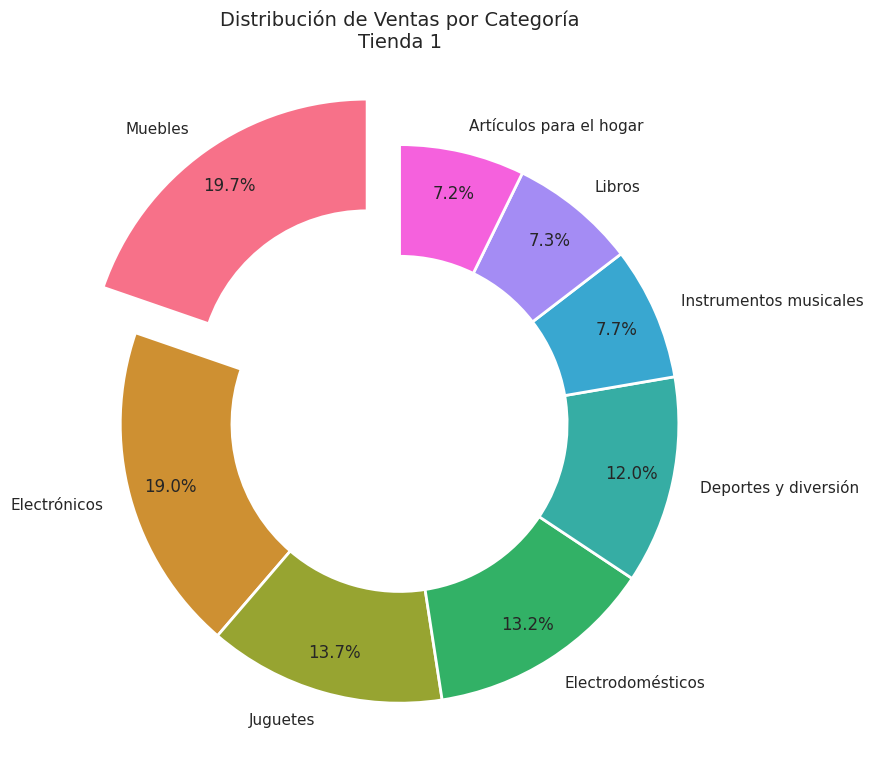


Tienda 2 - Distribución de categorías:
                 Categoría  Ventas
0                  Muebles     442
1             Electrónicos     422
2                 Juguetes     313
3        Electrodomésticos     305
4     Deportes y diversión     275
5   Instrumentos musicales     224
6                   Libros     197
7  Artículos para el hogar     181


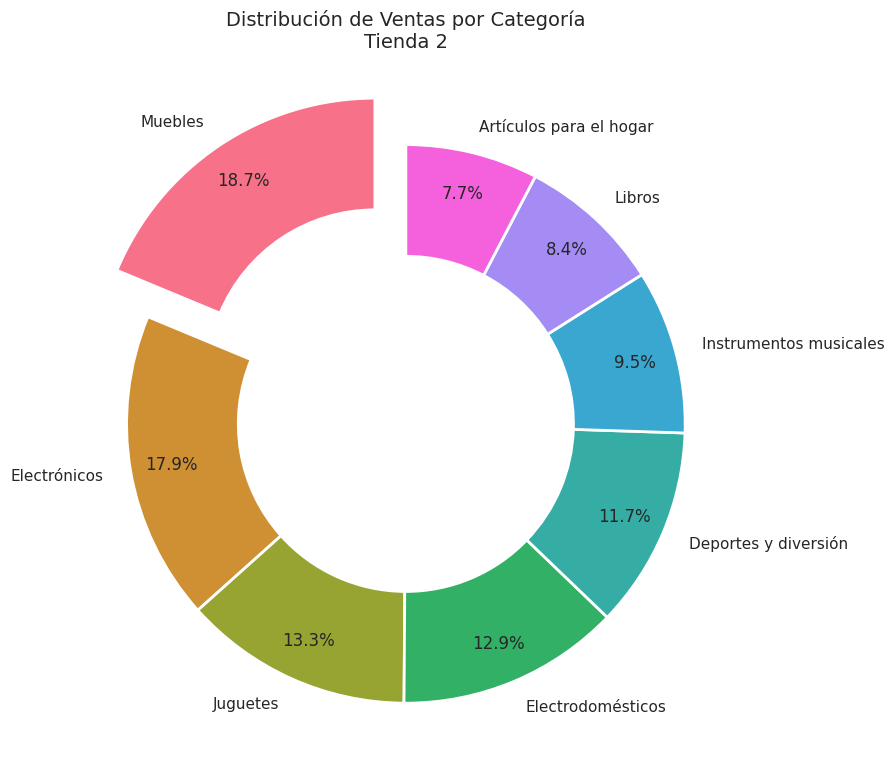


Tienda 3 - Distribución de categorías:
                 Categoría  Ventas
0                  Muebles     499
1             Electrónicos     451
2                 Juguetes     315
3        Electrodomésticos     278
4     Deportes y diversión     277
5                   Libros     185
6   Instrumentos musicales     177
7  Artículos para el hogar     177


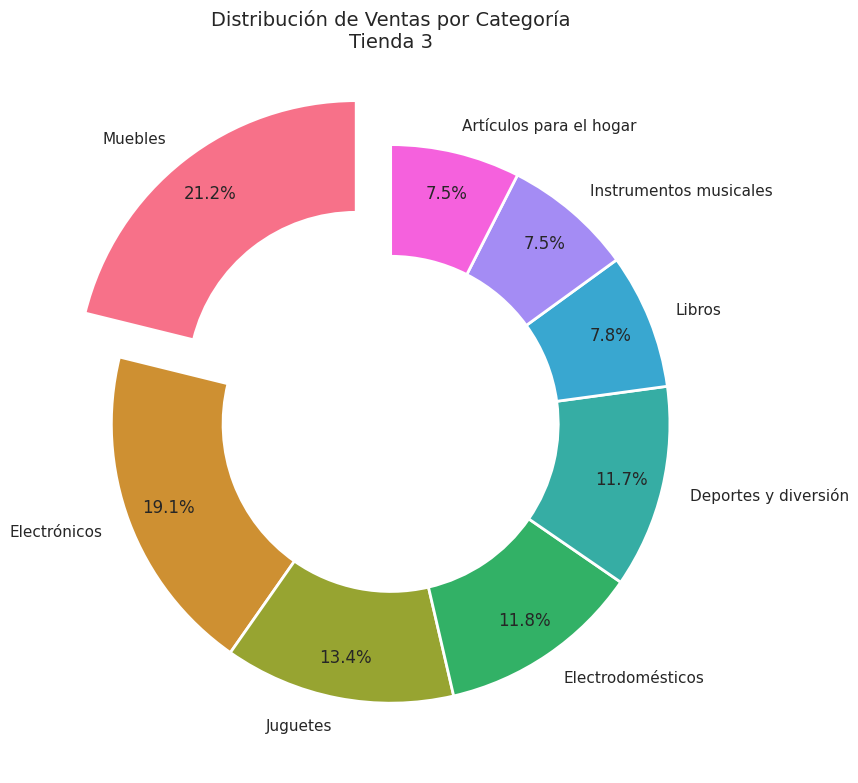


Tienda 4 - Distribución de categorías:
                 Categoría  Ventas
0                  Muebles     480
1             Electrónicos     451
2                 Juguetes     338
3     Deportes y diversión     277
4        Electrodomésticos     254
5  Artículos para el hogar     201
6                   Libros     187
7   Instrumentos musicales     170


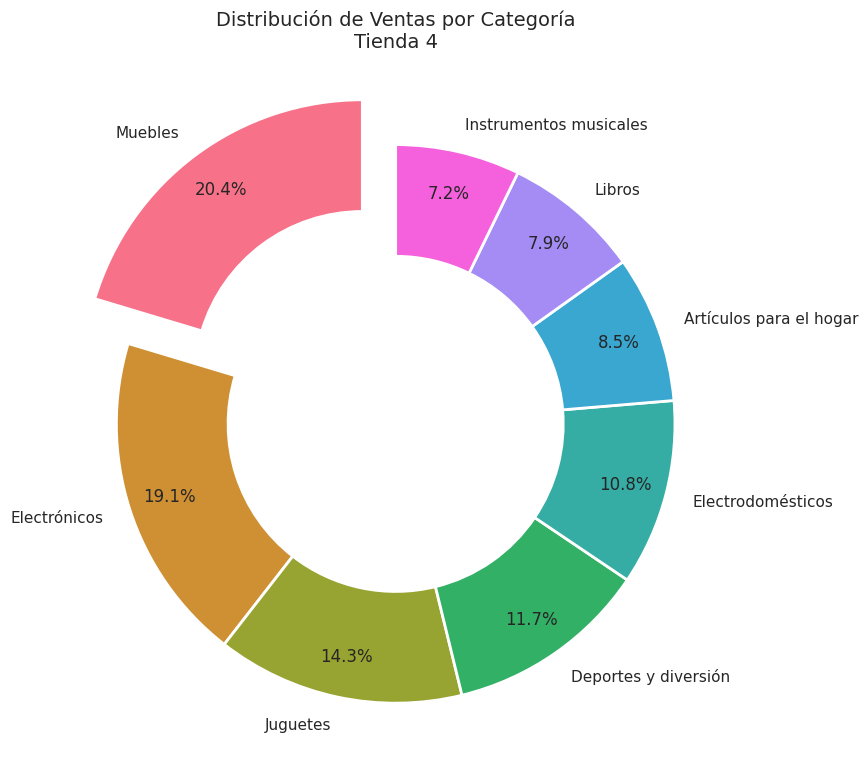

In [ ]:
# Aplicamos la funcion para cada tienda
print("=== VENTAS DE CATEGORÍAS POR TIENDA ===")
categorias_tienda = ventas_categorias(tienda1, "Tienda 1")
categorias_tienda2 = ventas_categorias(tienda2, "Tienda 2")
categorias_tienda3 = ventas_categorias(tienda3, "Tienda 3")
categorias_tienda4 = ventas_categorias(tienda4, "Tienda 4")

In [ ]:
#Agregamos un resumen con el top de las categorias mas vendias en cada tienda

top_categorias = pd.concat([
    categorias_tienda.assign(Tienda='Tienda 1').head(3),
    categorias_tienda2.assign(Tienda='Tienda 2').head(3),
    categorias_tienda3.assign(Tienda='Tienda 3').head(3),
    categorias_tienda4.assign(Tienda='Tienda 4').head(3)
])

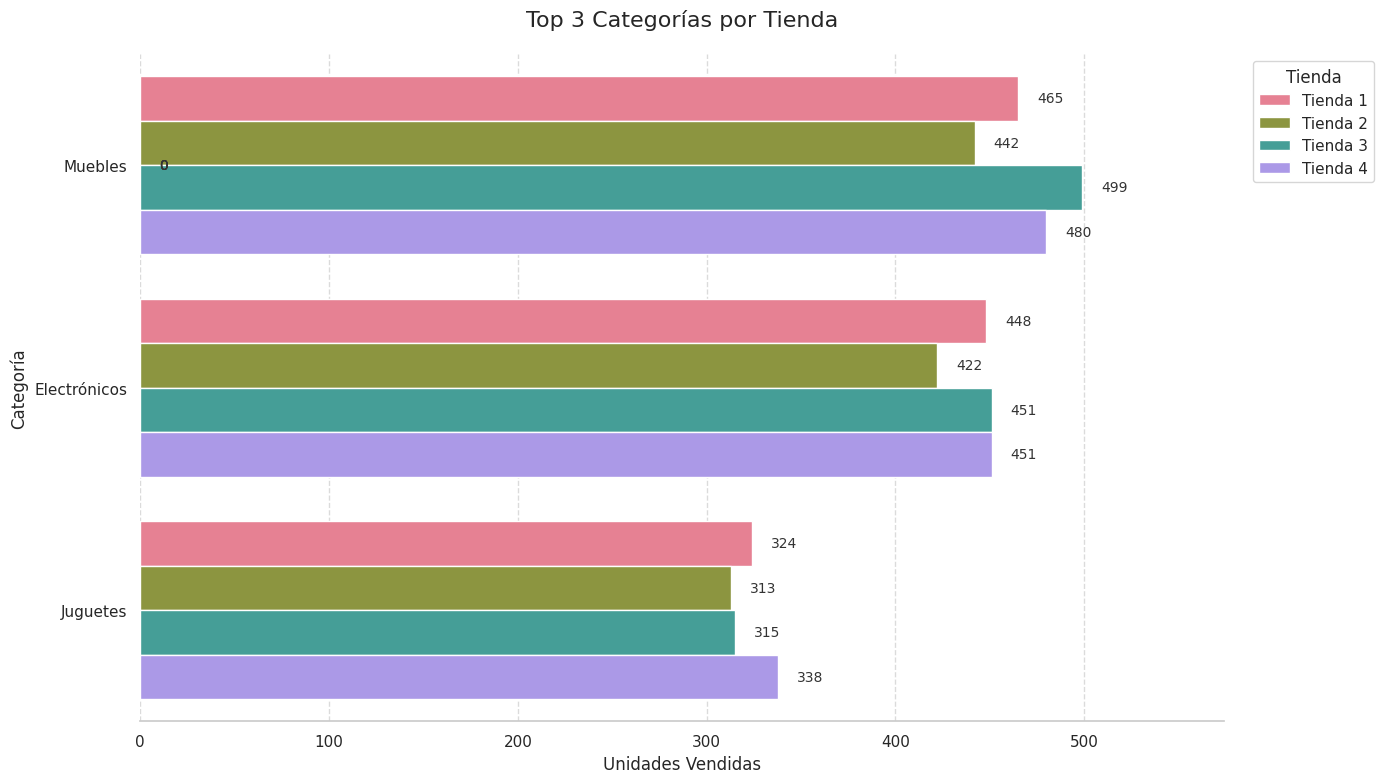

In [ ]:
#Agregamos la grafica de barras para poder visualizar mejor el top de categorias mas vendidas
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=top_categorias, x='Ventas', y='Categoría', hue='Tienda',
                palette="husl", edgecolor='w', linewidth=1)


for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.02*max(top_categorias['Ventas']),
            p.get_y() + p.get_height()/2,  #
            f'{int(width):,}',
            ha='left', va='center',
            fontsize=10,
            color='#333')

plt.title('Top 3 Categorías por Tienda', fontsize=16, pad=20)
plt.xlabel('Unidades Vendidas', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.legend(title='Tienda', title_fontsize=12, bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xlim(0, max(top_categorias['Ventas']) * 1.15)
sns.despine(left=True)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

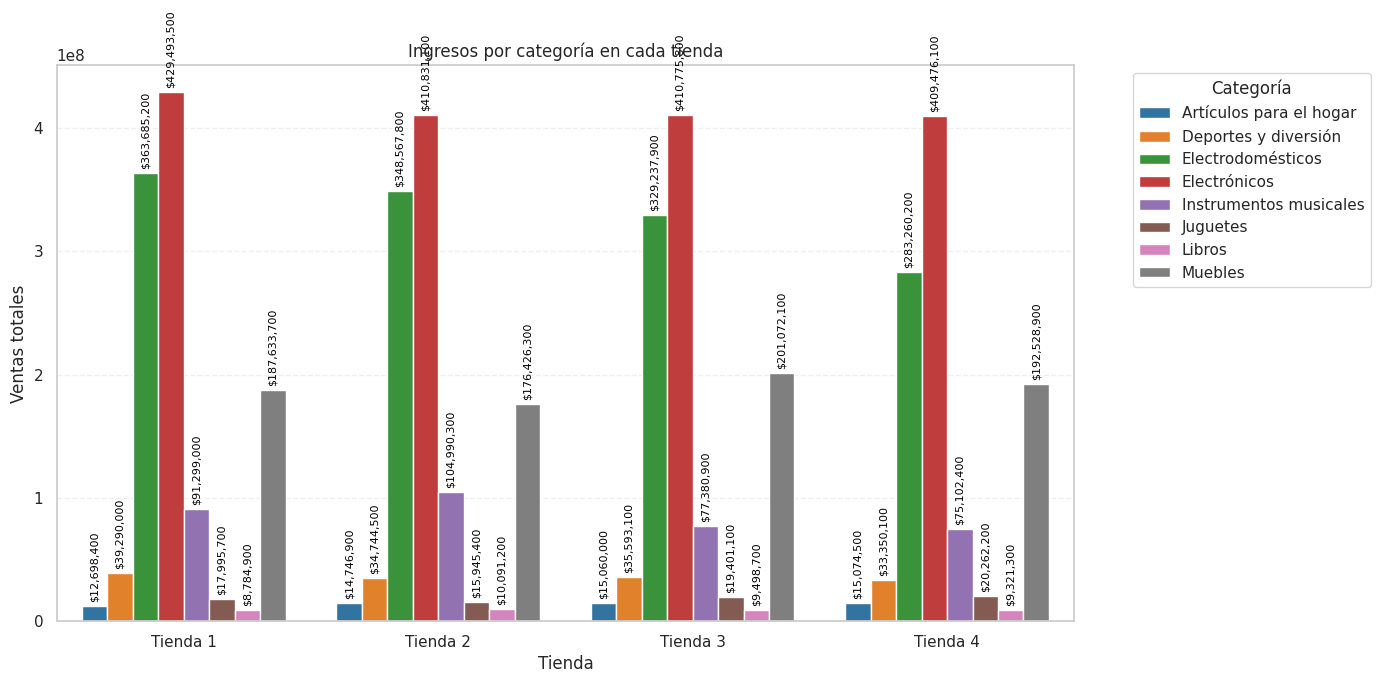

In [ ]:
#Revisamos los ingresos obtenidos por categoria en cada tienda

ventas_categoria = df_union.groupby(['Tienda', 'Categoría del Producto'])['Precio'].sum().reset_index()


plt.figure(figsize=(14, 7))


barplot = sns.barplot(
    data=ventas_categoria,
    x='Tienda',
    y='Precio',
    hue='Categoría del Producto',
    palette='tab10'
)


for container in barplot.containers:
    barplot.bar_label(container, fmt='${:,.0f}', label_type='edge', padding=3, fontsize=8, rotation = 90 ,color='black')


plt.title('Ingresos por categoría en cada tienda')
plt.ylabel('Ventas totales')
plt.xlabel('Tienda')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


**Dado los análisis anteriores verifiquemos si las bajas ventas de la tienda 4 se deben a una diferencia entre los precios de los productos, lo cual podría resolverse con una estrategia de ajuste de precios así mismo sus bajos ingresos podrían atribuirse a esto y no necesariamente a que la tienda estuviera mal**

In [ ]:

tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

df_union = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)


precios_promedio = df_union.groupby(['Producto', 'Tienda'])['Precio'].mean().reset_index()


precios_t4 = precios_promedio[precios_promedio['Tienda'] == 'Tienda 4'].copy()
precios_otros = precios_promedio[precios_promedio['Tienda'] != 'Tienda 4'].copy()


promedios_otros = precios_otros.groupby('Producto')['Precio'].mean().reset_index()
promedios_otros.rename(columns={'Precio': 'Precio Promedio Otras Tiendas'}, inplace=True)


comparacion_t4 = precios_t4.merge(promedios_otros, on='Producto', how='left')


comparacion_t4['Diferencia ($)'] = comparacion_t4['Precio Promedio Otras Tiendas'] - comparacion_t4['Precio']
comparacion_t4['Diferencia (%)'] = (comparacion_t4['Diferencia ($)'] / comparacion_t4['Precio Promedio Otras Tiendas']) * 100


comparacion_t4 = comparacion_t4.sort_values('Diferencia ($)', ascending=False)

comparacion_formateada = comparacion_t4[['Producto', 'Precio', 'Precio Promedio Otras Tiendas', 'Diferencia ($)', 'Diferencia (%)']].copy()
comparacion_formateada.columns = ['Producto', 'Precio en Tienda 4', 'Precio Promedio Otras', 'Diferencia ($)', 'Diferencia (%)']


comparacion_formateada['Precio en Tienda 4'] = comparacion_formateada['Precio en Tienda 4'].apply(lambda x: f"${x:,.2f}")
comparacion_formateada['Precio Promedio Otras'] = comparacion_formateada['Precio Promedio Otras'].apply(lambda x: f"${x:,.2f}")
comparacion_formateada['Diferencia ($)'] = comparacion_formateada['Diferencia ($)'].apply(lambda x: f"${x:,.2f}")
comparacion_formateada['Diferencia (%)'] = comparacion_formateada['Diferencia (%)'].apply(lambda x: f"{x:.2f}%")


print("Comparación de precios: Tienda 4 vs otras tiendas\n")
print(comparacion_formateada.head(10))


Comparación de precios: Tienda 4 vs otras tiendas

             Producto Precio en Tienda 4 Precio Promedio Otras Diferencia ($)  \
48      TV LED UHD 4K      $2,257,382.50         $2,322,679.15     $65,296.65   
39       Refrigerador      $1,980,839.47         $2,022,340.59     $41,501.12   
33         Microondas        $533,175.00           $565,048.24     $31,873.24   
43   Silla de oficina        $363,135.00           $387,239.93     $24,104.93   
8           Bicicleta        $476,217.78           $497,516.18     $21,298.40   
31    Mesa de comedor        $242,192.73           $257,718.28     $15,525.55   
20             Estufa        $687,676.60           $702,799.53     $15,122.94   
25          Iphone 15      $2,014,531.25         $2,027,766.88     $13,235.63   
21  Guitarra acústica        $304,245.95           $314,965.89     $10,719.95   
7             Batería        $720,164.58           $728,166.58      $8,002.00   

   Diferencia (%)  
48          2.81%  
39          2.05%

**Como se puede observar si bien existe una diferencia de precios esta es muy mínima aun asi esto puede ser relevante para los ingresos que la tienda recibe, si bien desconocemos si esta diferencia puede deberse a una estrategia para atraer más clientes o es una diferencia que debe corregirse para maximizar los ingresos que la tienda recibe**

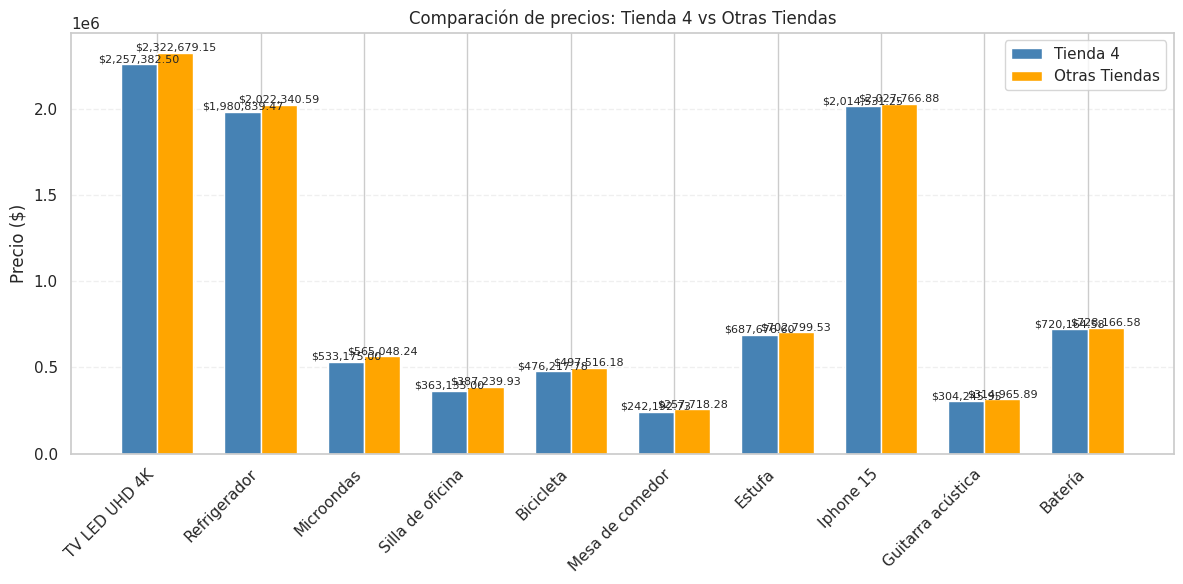

In [ ]:
#Realizamos una grafica para visualizar mejor la diferencia de precios
comparacion_t4['Producto'] = comparacion_t4['Producto'].astype(str)
comparacion_t4['Precio Tienda 4'] = comparacion_t4['Precio']
comparacion_t4['Precio Promedio Otras'] = comparacion_t4['Precio Promedio Otras Tiendas']

top10 = comparacion_t4.sort_values('Diferencia ($)', ascending=False).head(10)


productos = top10['Producto']
x = np.arange(len(productos))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
b1 = ax.bar(x - width/2, top10['Precio Tienda 4'], width, label='Tienda 4', color='steelblue')
b2 = ax.bar(x + width/2, top10['Precio Promedio Otras'], width, label='Otras Tiendas', color='orange')

for bar in b1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f"${height:,.2f}", ha='center', va='bottom', fontsize=8)

for bar in b2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f"${height:,.2f}", ha='center', va='bottom', fontsize=8)


ax.set_ylabel('Precio ($)')
ax.set_title('Comparación de precios: Tienda 4 vs Otras Tiendas')
ax.set_xticks(x)
ax.set_xticklabels(productos, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
# Se calcula el promedio de las calificacioness de cada tienda
promedios = {
    'Tienda 1': tienda1['Calificación'].mean(),
    'Tienda 2': tienda2['Calificación'].mean(),
    'Tienda 3': tienda3['Calificación'].mean(),
    'Tienda 4': tienda4['Calificación'].mean()
}

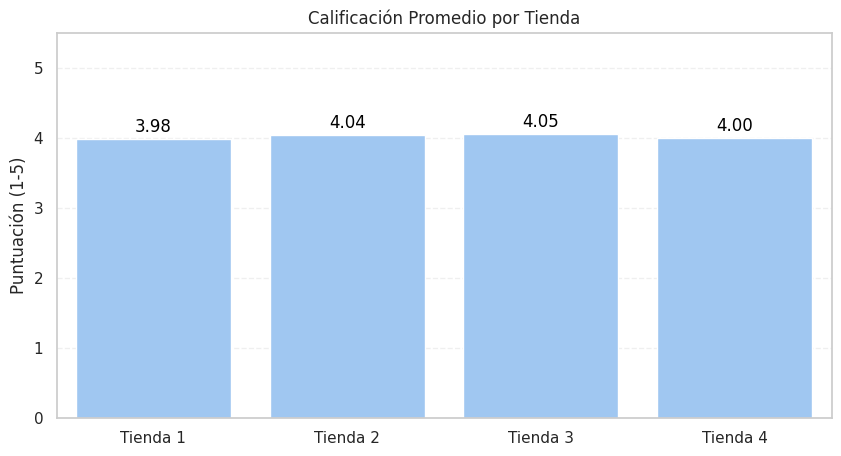


Resumen de Calificaciones:
          Calificación Promedio
Tienda 1               3.976685
Tienda 2               4.037304
Tienda 3               4.048326
Tienda 4               3.995759


In [ ]:
#Creamos la grafica para poder visualizar mejor los promedios por tienda
plt.figure(figsize=(10, 5))
sns.barplot(x=list(promedios.keys()),
            y=list(promedios.values()),
            )

for i, valor in enumerate(promedios.values()):
    plt.text(i, valor + 0.1, f'{valor:.2f}',
             ha='center',
             color='black')

plt.title('Calificación Promedio por Tienda')
plt.ylabel('Puntuación (1-5)')
plt.ylim(0, 5.5)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

# Mostramos un pequeño resumen de las calificaciones
print("\nResumen de Calificaciones:")
print(pd.DataFrame.from_dict(promedios,
                           orient='index',
                           columns=['Calificación Promedio']))

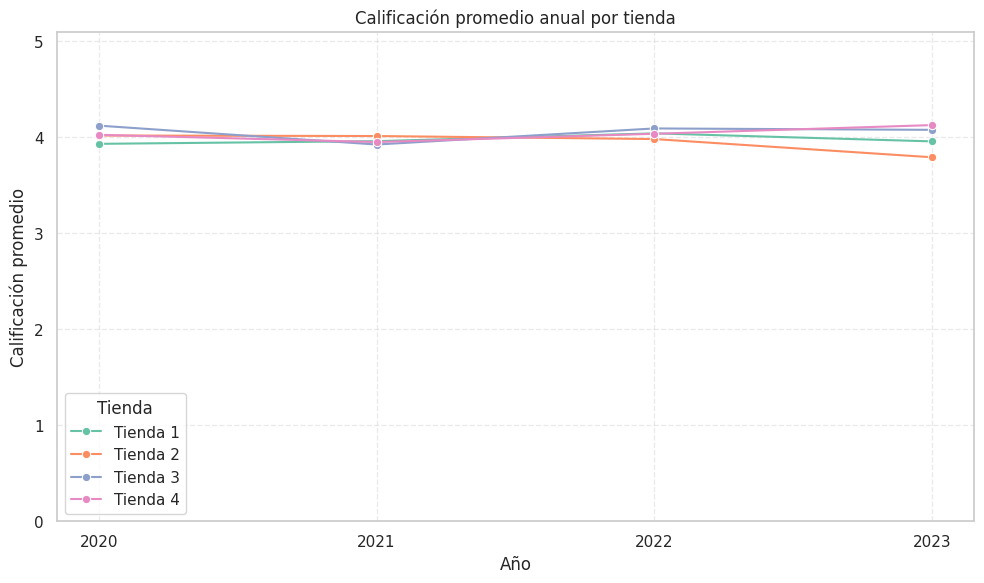

In [ ]:
#Verificamos como han sido las calificaciones recibidas por año

tienda1['Año'] = tienda1['Fecha de Compra'].dt.year
tienda1['Tienda'] = 'Tienda 1'
tienda2['Año'] = tienda2['Fecha de Compra'].dt.year
tienda2['Tienda'] = 'Tienda 2'
tienda3['Año'] = tienda3['Fecha de Compra'].dt.year
tienda3['Tienda'] = 'Tienda 3'
tienda4['Año'] = tienda4['Fecha de Compra'].dt.year
tienda4['Tienda'] = 'Tienda 4'

df_union = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

calificaciones_anuales = df_union.groupby(['Año', 'Tienda'])['Calificación'].mean().reset_index()
calificaciones_anuales = calificaciones_anuales.sort_values(['Tienda', 'Año'])


plt.figure(figsize=(10, 6))
sns.lineplot(data=calificaciones_anuales, x='Año', y='Calificación', hue='Tienda', marker='o', palette='Set2')

plt.title('Calificación promedio anual por tienda')
plt.ylabel('Calificación promedio')
plt.xticks(df_ventas_anuales.index.astype(int))
plt.ylim(0, 5.1)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



**Observamos que las calificaciones recibidas en las tiendas se mantienen en un nivel alto, por lo que esto no podría ser un factor determinante para las bajas ventas**

In [ ]:
#Verificamos si existen productos que reciban bajas calificaciones
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

df_union = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
calificaciones_por_producto = df_union.groupby(['Tienda', 'Producto'])['Calificación'].agg(['mean', 'count']).reset_index()
calificaciones_por_producto.rename(columns={'mean': 'Calificación Promedio', 'count': 'Cantidad de Calificaciones'}, inplace=True)


calificaciones_filtradas = calificaciones_por_producto[calificaciones_por_producto['Cantidad de Calificaciones'] >= 5]
peores_por_tienda = calificaciones_filtradas.sort_values(['Tienda', 'Calificación Promedio']).groupby('Tienda').head(5)

print("Productos con peor calificación promedio por tienda:\n")
print(peores_por_tienda)


Productos con peor calificación promedio por tienda:

       Tienda             Producto  Calificación Promedio  \
42   Tienda 1         Set de vasos               3.292683   
41   Tienda 1         Set de ollas               3.581395   
17   Tienda 1   Cuerda para saltar               3.625000   
3    Tienda 1          Auriculares               3.640000   
35   Tienda 1  Modelado predictivo               3.647059   
66   Tienda 2           Cubertería               3.615385   
67   Tienda 2      Cubo mágico 8x8               3.622222   
101  Tienda 2         Vaso térmico               3.659574   
87   Tienda 2          Muñeca bebé               3.708333   
79   Tienda 2     Lavadora de ropa               3.734694   
135  Tienda 3           Microondas               3.500000   
151  Tienda 3          Tablet ABXY               3.666667   
132  Tienda 3       Mesa de centro               3.690476   
104  Tienda 3    Asistente virtual               3.692308   
108  Tienda 3    Balón de volei

**Es posible descartar que las bajas ventas puedan atribuirse a una baja calificación de los productos, si bien las calificaciones están en un rango de 3.29 – 3.79 esto no implica realmente una alarma para poder tomarlas como un factor de terminante.**

In [ ]:
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

df_union = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Calculamos el promedio de las calificaciones recibidas por cada empleado
calif_empleados = df_union.groupby(['Tienda', 'Vendedor'])['Calificación'].agg(['mean', 'count']).reset_index()
calif_empleados.columns = ['Tienda', 'Vendedor', 'Calificación Promedio', 'Cantidad de Ventas']


calif_empleados = calif_empleados.sort_values(['Tienda', 'Calificación Promedio'])

# Verificamos la calificaciones mas bajas recibidas
peores = calif_empleados.groupby('Tienda').head(3)

print("Empleados con calificaciones más bajas por tienda:\n")
print(peores)



Empleados con calificaciones más bajas por tienda:

      Tienda         Vendedor  Calificación Promedio  Cantidad de Ventas
4   Tienda 1  Izabela de León               3.751269                 197
5   Tienda 1   Juan Fernandez               3.852761                 163
8   Tienda 1    Maria Alfonso               3.884393                 173
15  Tienda 2   Blanca Ramirez               3.933735                 166
26  Tienda 2   Santiago Silva               3.937888                 161
20  Tienda 2    Juliana Costa               3.938547                 179
32  Tienda 3  Izabela de León               3.730994                 171
34  Tienda 3    Juliana Costa               3.806061                 165
36  Tienda 3    Maria Alfonso               3.951613                 186
52  Tienda 4      Pedro Gomez               3.857143                 154
50  Tienda 4    Maria Alfonso               3.906667                 150
44  Tienda 4    Camila Rivera               3.915663                 166

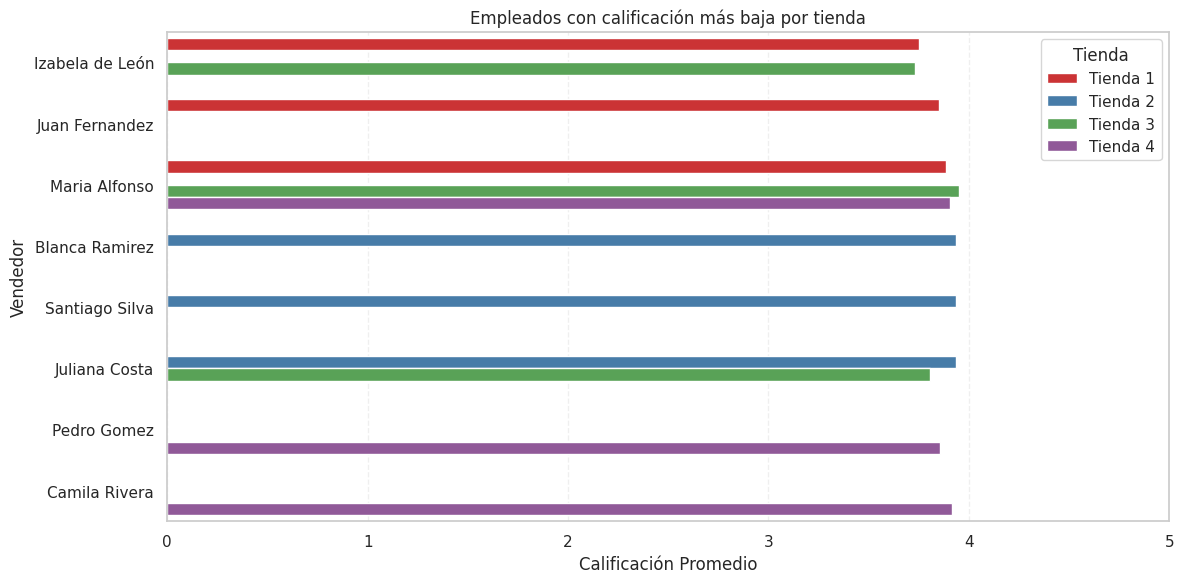

In [ ]:

plt.figure(figsize=(12, 6))
sns.barplot(
    data=peores,
    x='Calificación Promedio',
    y='Vendedor',
    hue='Tienda',
    dodge=True,
    palette='Set1'
)

plt.title('Empleados con calificación más baja por tienda')
plt.xlabel('Calificación Promedio')
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


**Con lo anterior podemos determinar que no existe empleados con bajas calificaciones ni consistentes a las mismas, por lo que la atención de los clientes no es un factor que podría determinar una baja venta en la tienda**

# 4. Productos más y menos vendidos

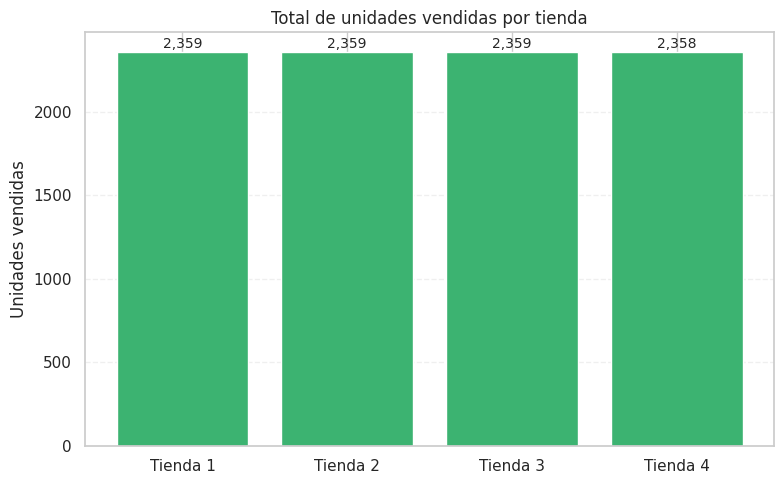

In [ ]:
#Visualizamos primeramente el total de unidades vendidas en cada tienda
ventas_unidades = {
    'Tienda 1': len(tienda1),
    'Tienda 2': len(tienda2),
    'Tienda 3': len(tienda3),
    'Tienda 4': len(tienda4)
}

tiendas = list(ventas_unidades.keys())
unidades = list(ventas_unidades.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiendas, unidades, color='mediumseagreen')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{int(yval):,}', ha='center', va='bottom', fontsize=10)

plt.title('Total de unidades vendidas por tienda')
plt.ylabel('Unidades vendidas')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


Tienda 1 - Productos más vendidos:

Producto
Microondas                 60
TV LED UHD 4K              60
Armario                    60
Secadora de ropa           58
Mesa de noche              56
Bloques de construcción    56
Balón de baloncesto        55
Bicicleta                  54
Vaso térmico               54
Refrigerador               54

Tienda 1 - Productos menos vendidos:

Producto
Muñeca bebé                    40
Mesa de comedor                40
Dinosaurio Rex                 40
Cuerda para saltar             40
Mochila                        39
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33


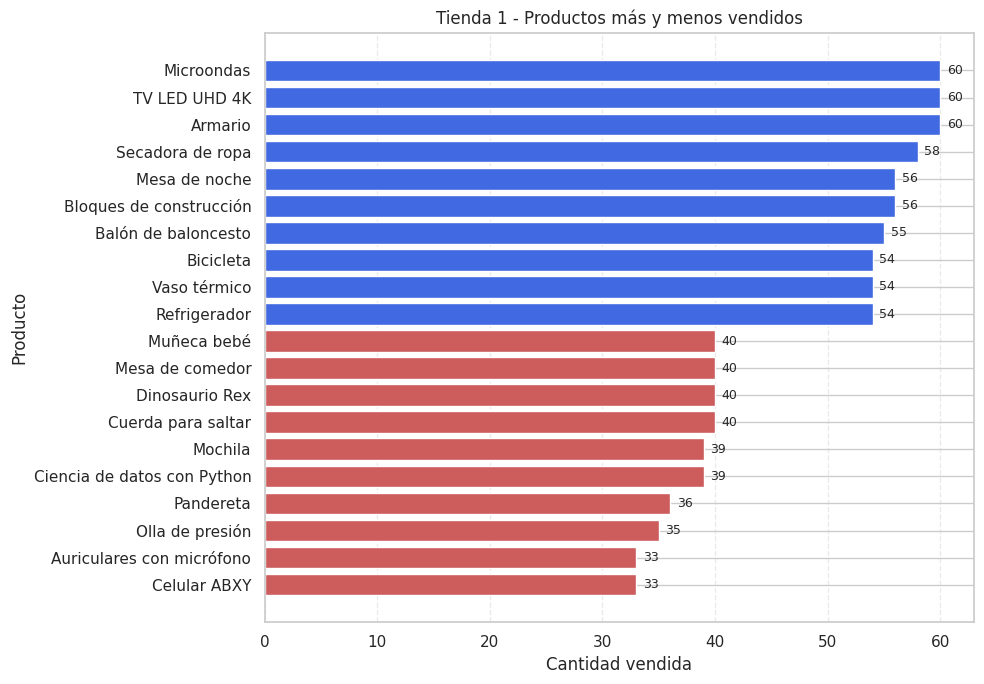


Tienda 2 - Productos más vendidos:

Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Secadora de ropa             57
Iphone 15                    55
Bloques de construcción      54
Armario                      54
Set de ollas                 52

Tienda 2 - Productos menos vendidos:

Producto
Dinosaurio Rex       42
Celular ABXY         41
Smart TV             40
Cubertería           39
Asistente virtual    38
Auriculares          37
Sillón               35
Mesa de comedor      34
Impresora            34
Juego de mesa        32


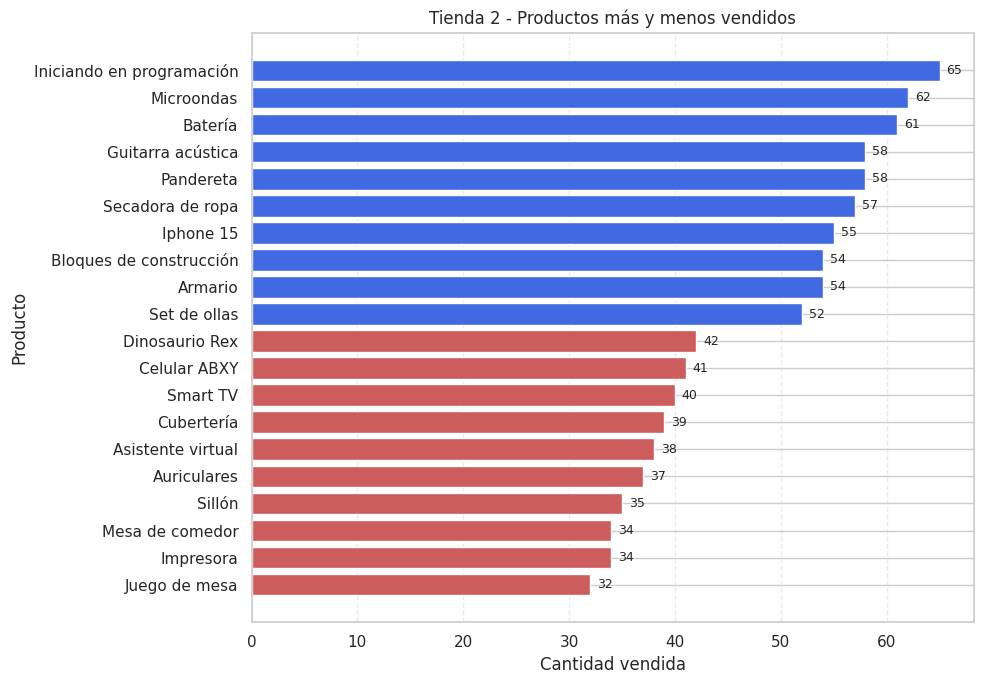


Tienda 3 - Productos más vendidos:

Producto
Kit de bancas                57
Mesa de comedor              56
Cama king                    56
Set de ollas                 55
Mesa de noche                55
Smart TV                     54
Estufa                       53
Cuerda para saltar           53
Modelado predictivo          53
Carrito de control remoto    52

Tienda 3 - Productos menos vendidos:

Producto
Cubertería                   39
Muñeca bebé                  39
Auriculares con micrófono    39
Asistente virtual            39
Vaso térmico                 38
Guitarra eléctrica           38
Set de vasos                 36
Mochila                      36
Microondas                   36
Bloques de construcción      35


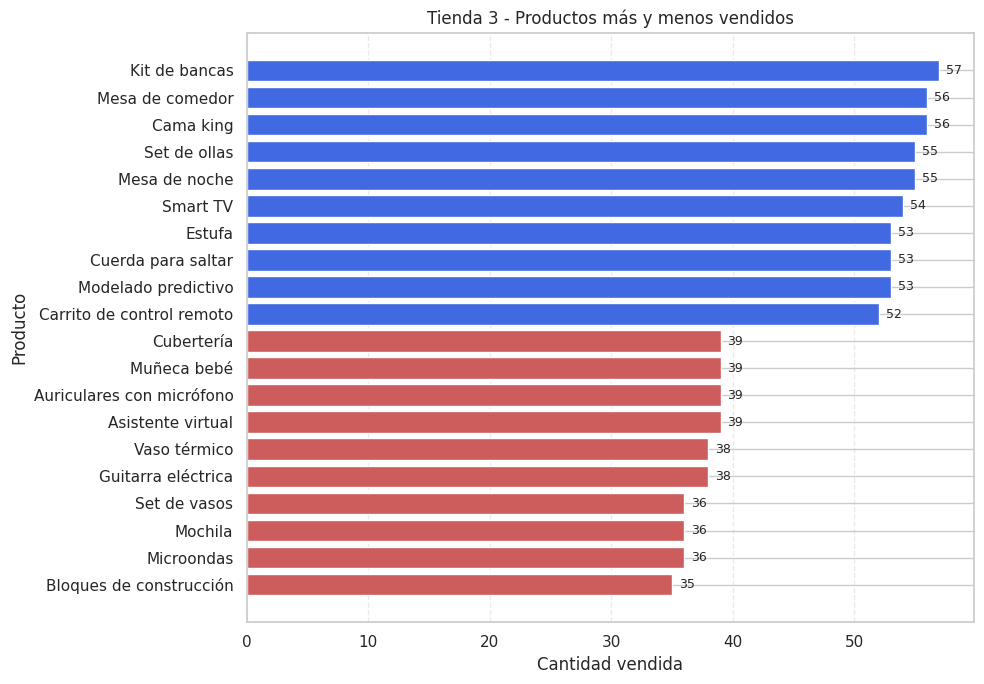


Tienda 4 - Productos más vendidos:

Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Mesa de comedor              55
Mesa de noche                55
Smart TV                     54
Bloques de construcción      54
Pandereta                    52

Tienda 4 - Productos menos vendidos:

Producto
Silla de oficina               40
Celular ABXY                   39
Ajedrez de madera              39
Smartwatch                     39
Lavadora de ropa               38
Refrigerador                   38
Ciencia de datos con Python    38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33


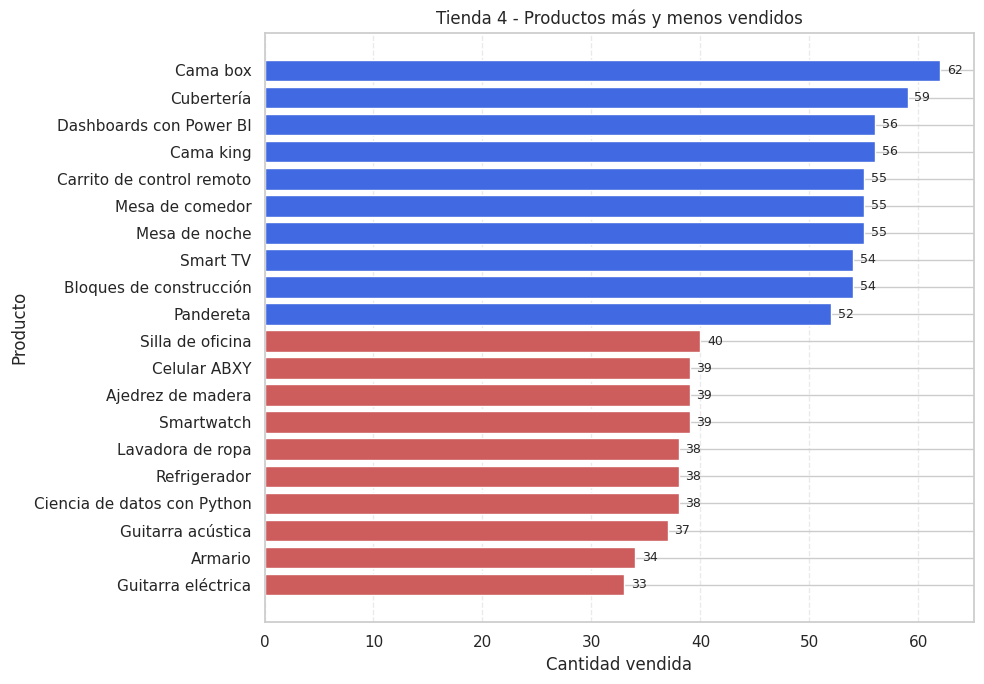

In [ ]:
#Ahora desglosamos las unidades vendidas en cada tienda para ver cuáles fueron las productos más vendidos
tiendas = {
    'Tienda 1': tienda1,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

#Creamos una funcion para poder contar los productos mas vendidos y los menos vendidos
#asi mismo poder graficarlos
def productos_menos_mas_vendidos(df_tiendas, numero_tienda):
    conteo = df_tiendas['Producto'].value_counts()
    mas_vendidos = conteo.head(10)
    menos_vendidos = conteo.tail(10)

    print(f"\n{numero_tienda} - Productos más vendidos:\n")
    print(mas_vendidos.to_string())
    print(f"\n{numero_tienda} - Productos menos vendidos:\n")
    print(menos_vendidos.to_string())

    productos = pd.concat([mas_vendidos, menos_vendidos])
    colores = ['royalblue'] * len(mas_vendidos) + ['indianred'] * len(menos_vendidos)


    plt.figure(figsize=(10, 7))
    bars = plt.barh(productos.index, productos.values, color=colores)

    for bar in bars:
        ancho = bar.get_width()
        plt.text(
            ancho + max(productos.values) * 0.01,
            bar.get_y() + bar.get_height() / 2,
            f'{int(ancho)}',
            va='center',
            ha='left',
            fontsize=9
        )

    plt.title(f"{numero_tienda} - Productos más y menos vendidos")
    plt.xlabel("Cantidad vendida")
    plt.ylabel("Producto")
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

# Ejecutamos la funcion para visualizar los resultados
for nombre, df in tiendas.items():
    productos_menos_mas_vendidos(df, nombre)

In [ ]:
# Validamos la cantidad de productos ofertadas en cada tienda
variedad_productos = {
    'Tienda 1': tienda1['Producto'].nunique(),
    'Tienda 2': tienda2['Producto'].nunique(),
    'Tienda 3': tienda3['Producto'].nunique(),
    'Tienda 4': tienda4['Producto'].nunique()
}

for tienda, cantidad in variedad_productos.items():
    print(f"{tienda}: {cantidad} productos únicos")


Tienda 1: 51 productos únicos
Tienda 2: 51 productos únicos
Tienda 3: 51 productos únicos
Tienda 4: 51 productos únicos


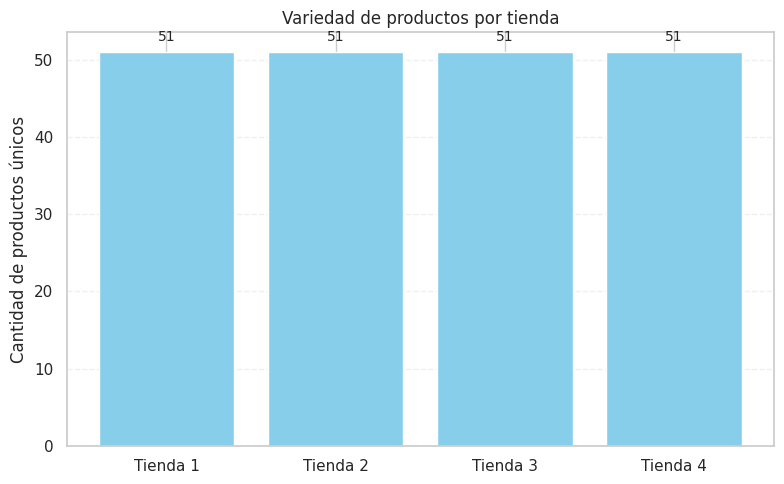

In [ ]:
#Graficamos los resultados
tiendas = list(variedad_productos.keys())
valores = list(variedad_productos.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(tiendas, valores, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}', ha='center', va='bottom', fontsize=10)

plt.title('Variedad de productos por tienda')
plt.ylabel('Cantidad de productos únicos')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

**Al haber una igual competitividad en cantidad de productos descartamos que la tienda 4 pueda tener una baja de ingresos debido a la diferencia de oferta entre productos  **

# 5. Envío promedio por tienda

In [ ]:
# Cálculamos el costo de envío promedio por tienda
costo_envio_promedio = {
    'Tienda 1': tienda1['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}

print("Costo de envío promedio por tienda:\n")
for tienda, costo in costo_envio_promedio.items():
    print(f"{tienda}: ${costo:,.2f}")


Costo de envío promedio por tienda:

Tienda 1: $26,018.61
Tienda 2: $25,216.24
Tienda 3: $24,805.68
Tienda 4: $23,459.46


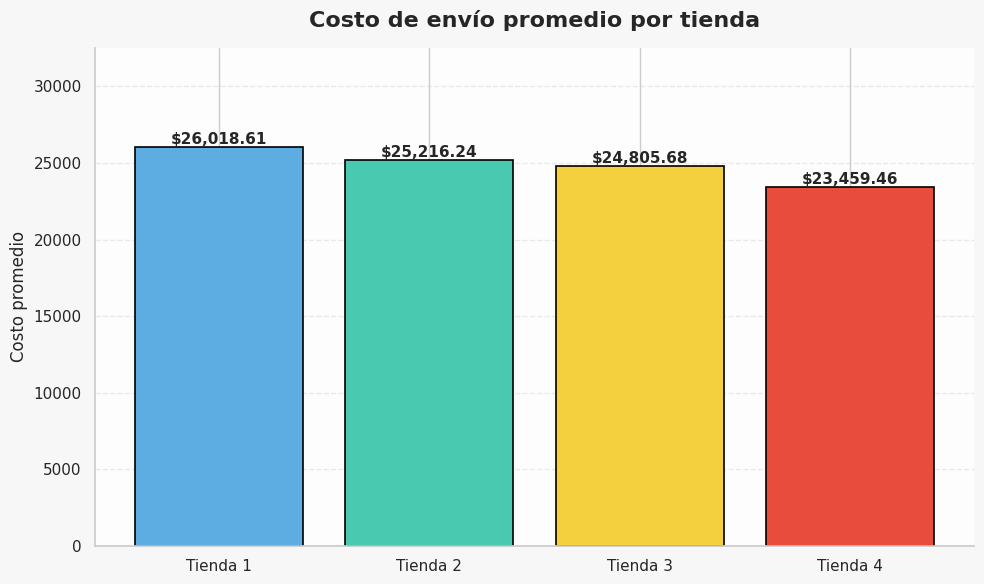

In [ ]:
#Creamos una grafica para poder observar mejor los promedios de costo de envio
envio_promedio = {
    'Tienda 1': tienda1['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}


numero_tienda = list(envio_promedio.keys())
costos_envio = list(envio_promedio.values())


colors = ['#5DADE2', '#48C9B0', '#F4D03F', '#E74C3C']


fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(numero_tienda, costos_envio, color=colors, edgecolor='black', linewidth=1.2)


for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.3,
        f"${yval:,.2f}",
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )


ax.set_title('Costo de envío promedio por tienda', fontsize=16, fontweight='bold', pad=15)
ax.set_ylabel('Costo promedio', fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_ylim(0, max(costos_envio) * 1.25)


fig.patch.set_facecolor('#f7f7f7')
ax.set_facecolor('#fdfdfd')

plt.tight_layout()
plt.show()


In [ ]:
# Verificamos si existe una correlacion entre el costo de envio con la calificacion que reciben las tiendas

#promedio de costo de envio
envio_promedio = {
    'Tienda 1': tienda1['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}

# promedio de calificación por tienda
calificacion_promedio = {
    'Tienda 1': tienda1['Calificación'].mean(),
    'Tienda 2': tienda2['Calificación'].mean(),
    'Tienda 3': tienda3['Calificación'].mean(),
    'Tienda 4': tienda4['Calificación'].mean()
}


In [ ]:
#Creamos un dataframe para ambos valores
comparacion = pd.DataFrame({
    'Costo de Envío Promedio': envio_promedio,
    'Calificación Promedio': calificacion_promedio
}).reset_index().rename(columns={'index': 'Tienda'})

print(comparacion)


     Tienda  Costo de Envío Promedio  Calificación Promedio
0  Tienda 1             26018.609580               3.976685
1  Tienda 2             25216.235693               4.037304
2  Tienda 3             24805.680373               4.048326
3  Tienda 4             23459.457167               3.995759


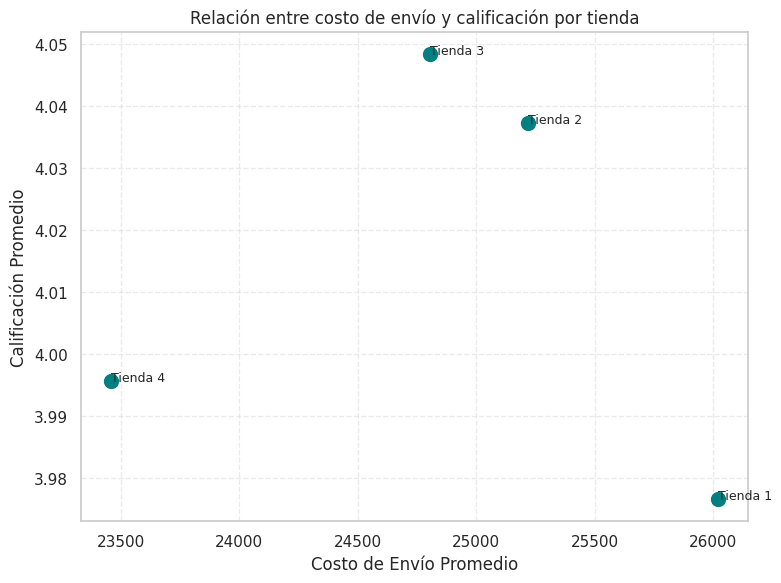

In [ ]:
#Creamos una grafica de dispersion para poder visualizar mejor

plt.figure(figsize=(8,6))
plt.scatter(comparacion['Costo de Envío Promedio'], comparacion['Calificación Promedio'], color='teal', s=100)


for i, row in comparacion.iterrows():
    plt.text(row['Costo de Envío Promedio'] + 0.05, row['Calificación Promedio'], row['Tienda'], fontsize=9)

plt.title('Relación entre costo de envío y calificación por tienda')
plt.xlabel('Costo de Envío Promedio')
plt.ylabel('Calificación Promedio')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
#Verificamos si existe una correlacion entre los costos de envio y la calificacion

correlacion = comparacion['Costo de Envío Promedio'].corr(comparacion['Calificación Promedio'])
print(f"Correlación entre costo de envío y calificación: {correlacion:.2f}")


Correlación entre costo de envío y calificación: -0.10


**Al obtenerse una correlación de -0.10 entendemos que no hay un relación significativa entre el costo de envió y la calificación por lo que podemos determinar que las calificaciones que reciben las tiendas no está basadas en el costo de envío de los productos**

# **Observaciones finales**

Habiendo realizado los análisis a diferentes factores que podrían afectar en las tiendas logramos percibir que la tienda 4 tiene unos ingresos bajos con relación al resto de las tiendas, si bien esto podría ser un factor para poder ser elegido con la tienda que podría ser vendida sin embargo, desde un punto de vista personal y analítico en base a los resultados, esto no contribuye a ser un factor totalmente para tomar dicha decisión, ya que únicamente se pudo percibir una baja de los ingresos debido a una diferencia de precios entre la tienda 4 con respecto a las demás tiendas, por igual cabe recalcar que no se encontraron mas problemas en la tienda que contribuyan a un factor determinante ya que no hubo problemas con la calidad, atención, catalogo o métodos de pago que puedan propiciar un factor a la baja de ingresos.
En base a lo anterior podemos atribuir únicamente la baja de ingresos a la diferencia de precios que presenta la tienda.

En base a lo anterior realizamos una simulación de la tienda 4 con un ajuste en sus precios

In [ ]:

precios_t1 = tienda1.groupby('Producto')['Precio'].mean().reset_index()
precios_t1.columns = ['Producto', 'Precio_T1']

tienda4_simulada = tienda4.merge(precios_t1, on='Producto', how='left')

tienda4_simulada['Ingreso_Simulado'] = tienda4_simulada['Precio_T1']


ingreso_real_t4 = tienda4['Precio'].sum()
ingreso_simulado_t4 = tienda4_simulada['Ingreso_Simulado'].sum()

print(f"Ingreso real Tienda 4: ${ingreso_real_t4:,.2f}")
print(f"Ingreso simulado (precios de Tienda 1): ${ingreso_simulado_t4:,.2f}")
print(f"Diferencia proyectada: ${ingreso_simulado_t4 - ingreso_real_t4:,.2f}")


Ingreso real Tienda 4: $1,038,375,700.00
Ingreso simulado (precios de Tienda 1): $1,041,290,271.44
Diferencia proyectada: $2,914,571.44


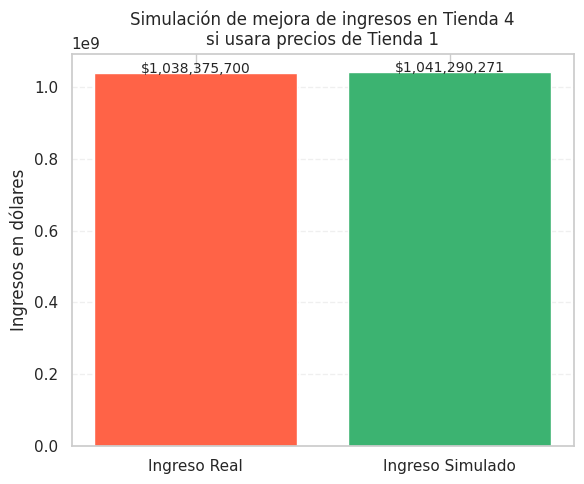

In [ ]:
#Creamos una grafica
plt.figure(figsize=(6, 5))
barras = plt.bar(['Ingreso Real', 'Ingreso Simulado'],
                 [ingreso_real_t4, ingreso_simulado_t4],
                 color=['tomato', 'mediumseagreen'])

for bar in barras:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y + 500, f"${y:,.0f}", ha='center', fontsize=10)

plt.title('Simulación de mejora de ingresos en Tienda 4\nsi usara precios de Tienda 1')
plt.ylabel('Ingresos en dólares')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


**Como puede observarse en la simulación las ventas de la tienda 4 apenas mejoran un 0.28%, no siendo una diferencia significativa para determinar que efectivamente la tienda 4 presenta un problema en sus ingresos debido al precio de los productos**


**Tomando en cuenta que la tienda 4 no tiene problemas críticos con los precios de ventas así como en base a la simulación determinamos que con un aumento de precios no es posible lograr una mejora significativa**

**Sin embargo pese al resultados cabe recalcar que no contamos con datos que podrían ser determinantes para entender el problema de la Tienda 4, como son posibles problemas con el stock, las utilidades por tienda así como el marketing y otros factores para poder determinar si la tienda 4 es o no rentable para el Sr.Juan, ya que la tienda genera ingresos a pesar de ser bajos por lo que venderla podría concluir en la perdida de esos ingresos fijos.**

**Por lo que concluimos con los datos que tenemos hasta el momento que la tienda 4 es la candidata a ser vendida por el Sr.Juan si  asi lo desea**